In [55]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikeras

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [56]:
%load_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sn #scikit-learn

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Aggiungi il percorso della cartella src al percorso di ricerca dei moduli
src_path = os.path.abspath('../src')
sys.path.append(src_path)

import DatabaseAsteroidsLib as Dal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
#Import CSV File and initialise in AsteroidsLib class
base_dir = os.path.dirname(os.path.dirname(os.path.abspath('dataManagementAsteroids.ipynb')))
csv_file_path = os.path.join(base_dir, 'input', 'nasa.csv')

lib = Dal.AsteroidsLib(path=csv_file_path)
df = lib.df
df_analysis = lib.df_analysis

# 1. Comprensione del quadro generale

Grandezza del dataset

In [58]:
df_analysis.shape

(4687, 40)

Info sulle Features

In [59]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

Descrizione generale del dataset

In [60]:
df_analysis.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242,0.161084
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627,0.367647
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,0.000000
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289,0.000000
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946,0.000000
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669,0.000000
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,1.000000


# 2. Preparazione del dataset

* esistono variabili inutili o ridondanti?
* la nomenclatura ha senso?
* ci sono delle nuove variabili che vogliamo creare?

In [61]:
df_analysis.duplicated().sum()

0

In questo dataset non ci sono righe duplicate e disponiamo di una nomenclatura delle variabili già soddisfaciente, inoltre per il momento non si vede la necessità di creare nuove variabili.

In [62]:
# Contare il numero di valori null per colonna
null_values = df_analysis.isnull().sum()
print(null_values)

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

Per ogni features andiamo a vedere se ci sono delle feature con un solo valore

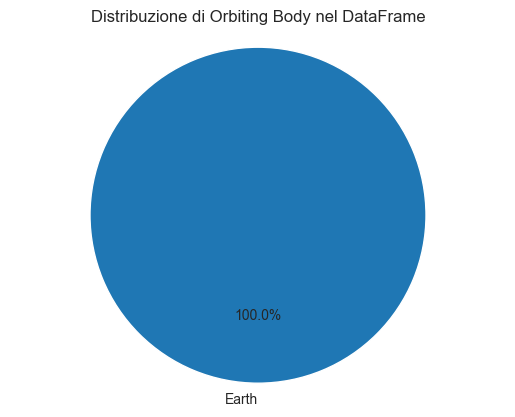

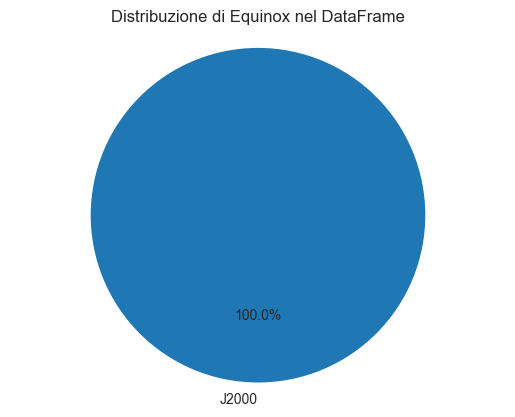

In [63]:
columns_to_remove=[]

for feature in lib.features:
    # Conta le occorrenze di ciascun valore della feature
    count = df_analysis[feature].value_counts()

    if len(count) == 1:

        # Crea il grafico a torta
        plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
        plt.axis('equal')
        plt.title('Distribuzione di ' + feature + ' nel DataFrame')
        plt.show()

        columns_to_remove.append(feature)

Poichè le feature `Orbiting Body` e `Equinox` hanno il 100% dei valori uguali rispettivamente a `Earth` e `J2000` possiamo droppare queste features. Inoltre essendo `Neo Reference ID`, `Name`, `Close Approach Date` e `Orbit Determination Date` feature utilizzate per identificare gli asteroidi e non direttamente correlate con la loro pericolosità decidiamo di droppare anche queste features.

In [64]:
columns_to_remove = columns_to_remove + ['Neo Reference ID', 'Name', 'Close Approach Date', 'Orbit Determination Date']
df_analysis = lib.remove_features(columns_to_remove)
df_analysis

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,1473318000000,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,1473318000000,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,1473318000000,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,1473318000000,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


Controlliamo se ci sono valori duplicati e nel caso li rimuoviamo

In [65]:
print('Numero di valori duplicati: ', df_analysis.duplicated().sum())
df_analysis = lib.remove_duplicates()

Numero di valori duplicati:  0


# Matrice di Correlazione
Prima di procedere con l'Analisi Univariata riteniamo necessario anticipare un parte dell'Analisi Multivariata per verificare l'esistenza di features in correlazione 1 tra di loro. Per fare questo utilizziamo la Matrice di Correlazione

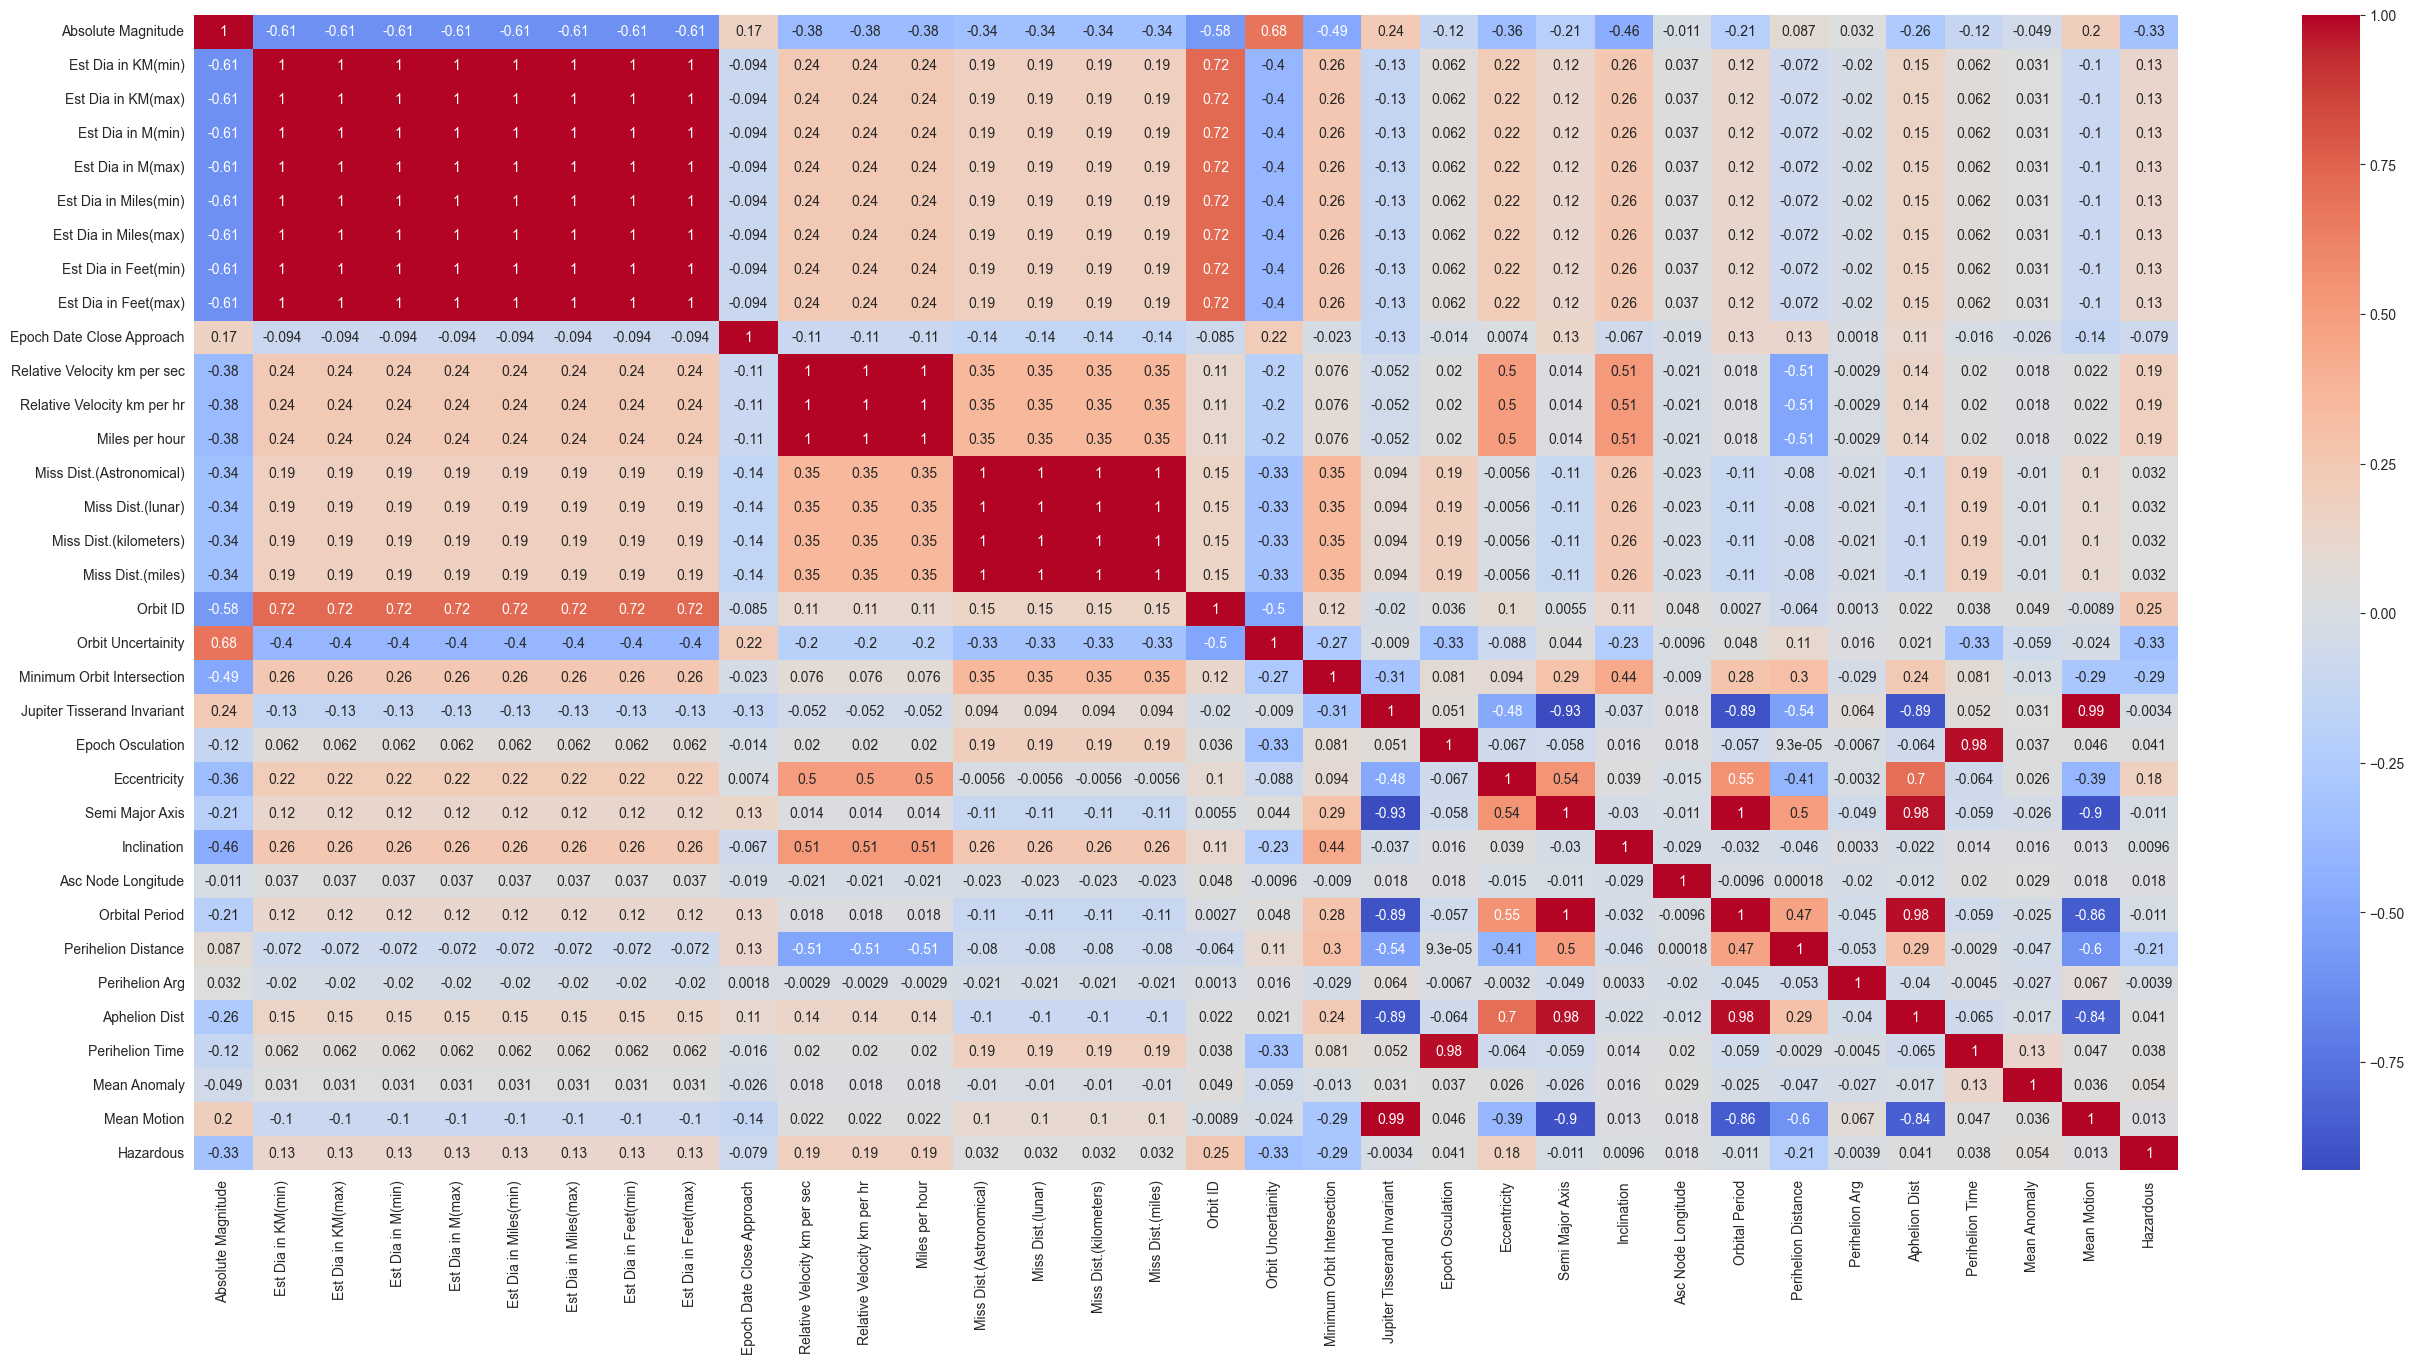

In [66]:
lib.correlation_matrix()

Grazie alla matrice di correlazione possiamo raggruppare tra di loro le features che hanno un livello di correlazione superiore alla threshold.

In [67]:
df_analysis = lib.correlated_features()

Gruppi di feature correlate:
	 ['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)']
	 ['Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miles per hour']
	 ['Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)']


Poichè queste liste di feature sono correlate tra loro con una correlazione del 100% possiamo tenere una sola di queste feature per gruppo e droppare le altre.
Per le feature presenti decidiamo di tenere:
* Est Dia in KM (min)
* Relative Velocity km per sec
* Miss Dist. (Astronomical)

# 3. Analisi Univariata

È importante fare una classificazione tra le diverse tipologie di features presenti nel nostro dataset:
- **Continue**
- **Categoriche**
- **Count**

## Box Plot
Per prima cosa stampiamo i boxplot di tutte le features continue standardizzando i valori in [0, 1]. Questo ci permette di individuare outliers, vedere come sono distribuiti i dati per ogni feature. La standardizzazione ci consente di visualizzare i dati insieme fornendo un quadro generale.

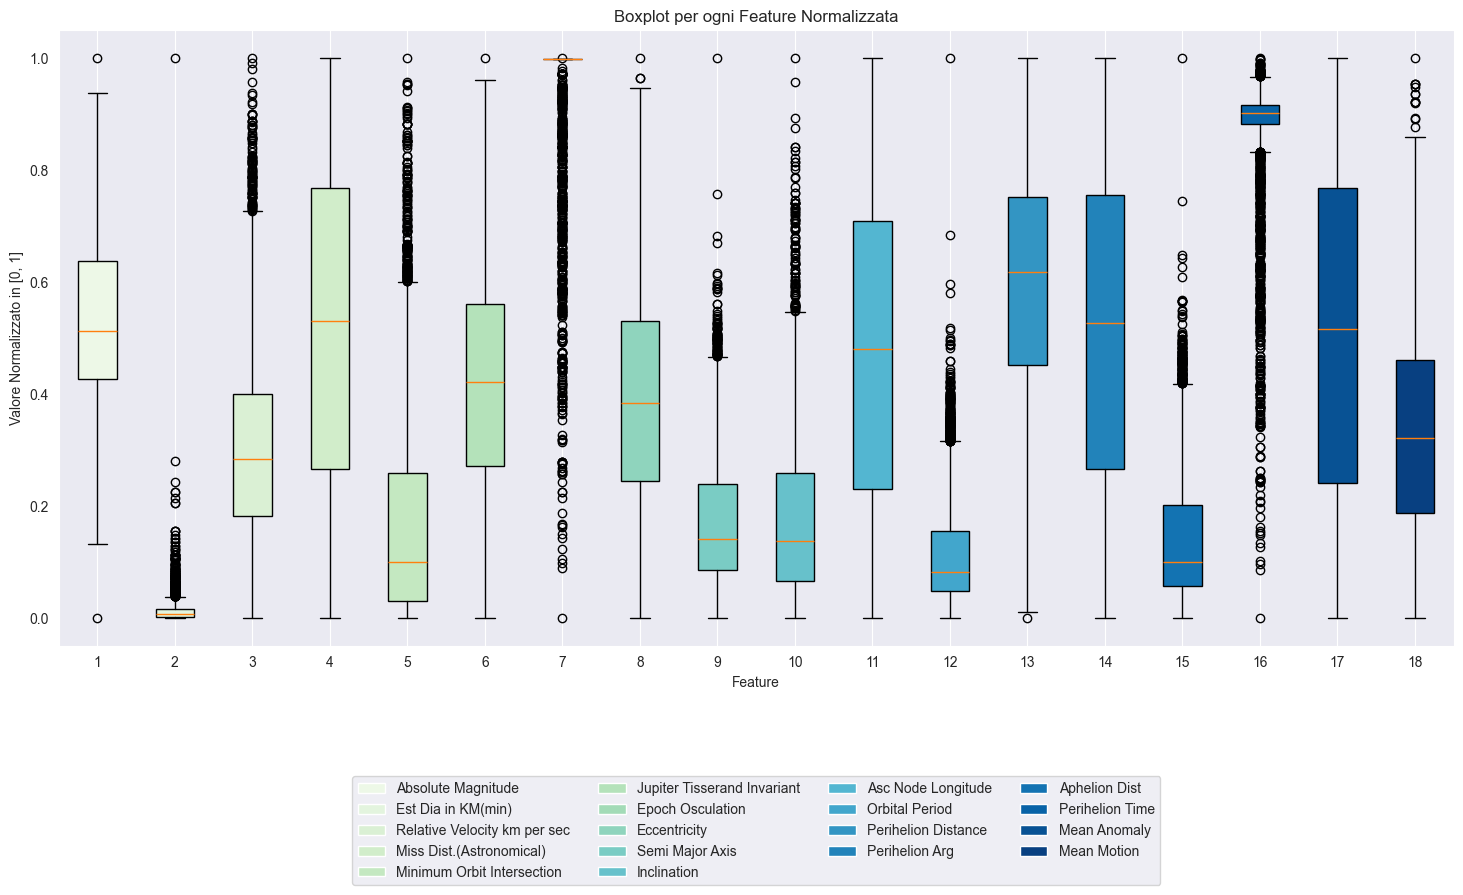

In [68]:
lib.box_plot_all(all_features=False, target=False)

## Bar Chart
Per le variabili Categoriche e Count utilizzando una Bar Chart è possibile vedere come sono suddivise le istanze del nostro dataset sulle diverse features

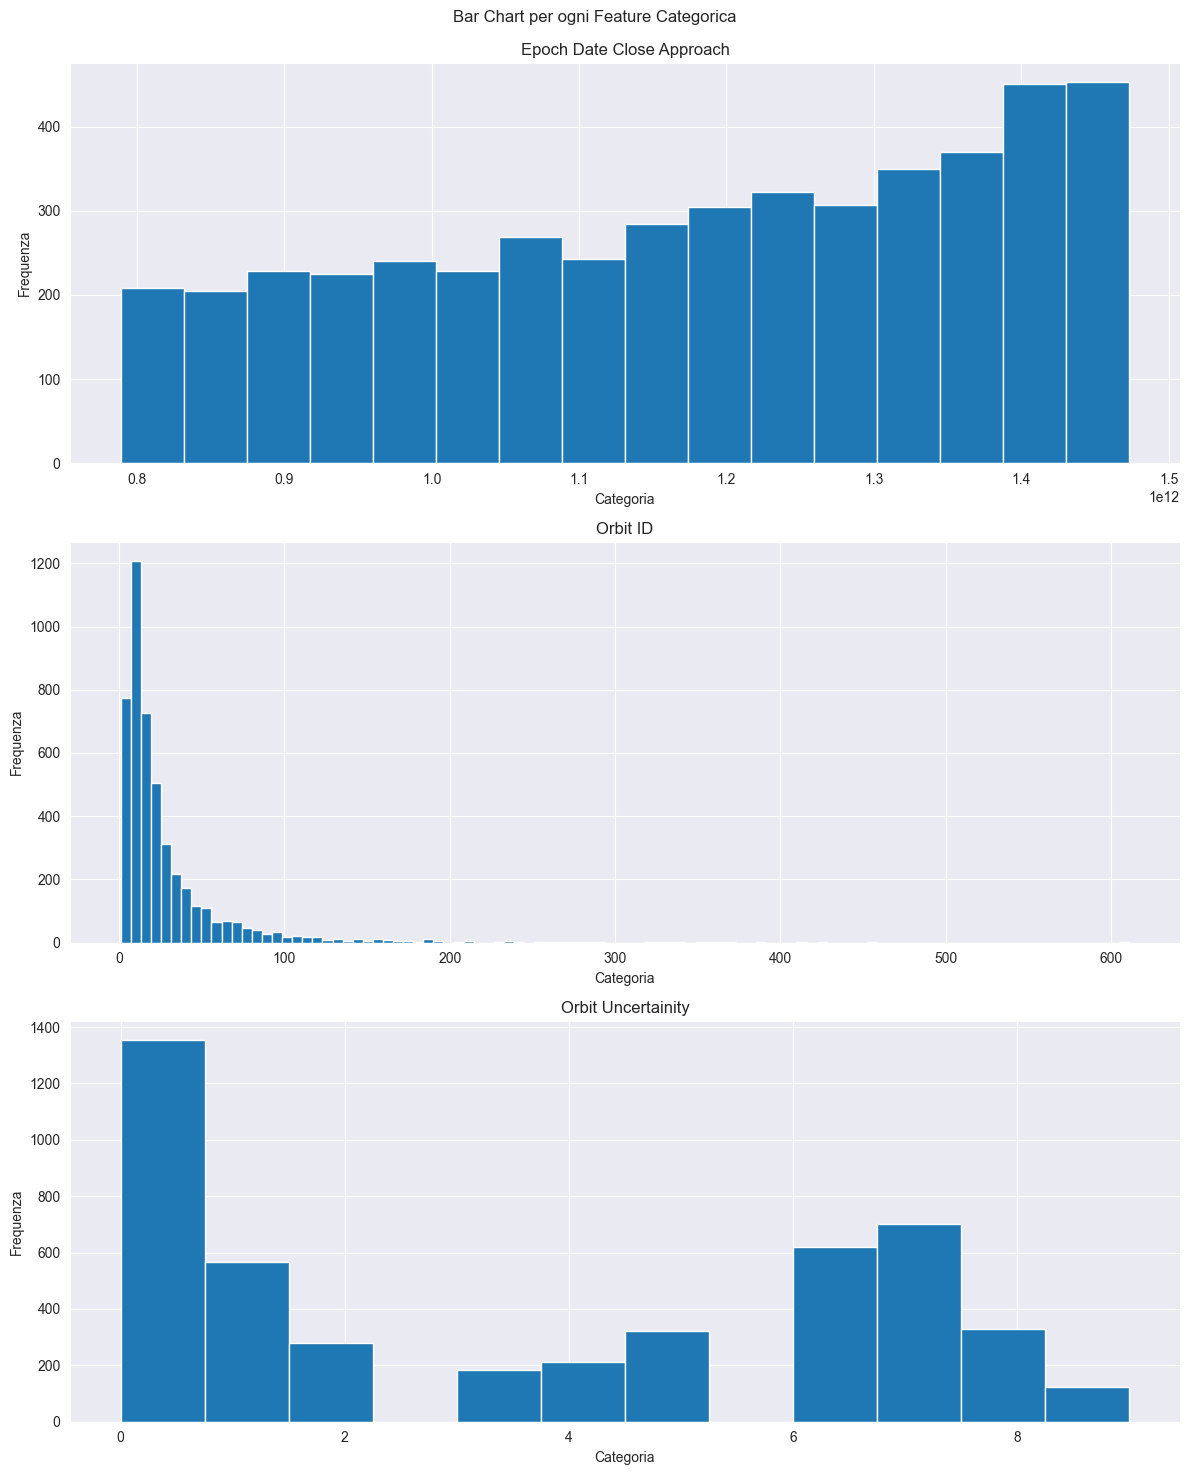

In [69]:
lib.bar_chart_all(target=False)

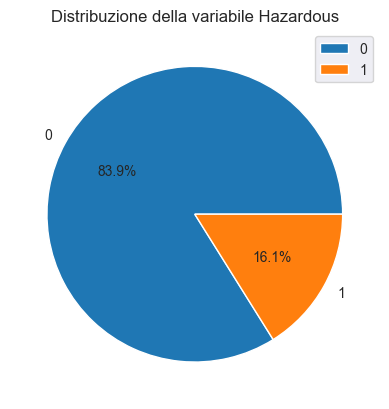

Valori False (= 0):  3932
Valori True (= 1):  755


In [70]:
lib.pie_chart()


# 4. Analisi Multivariata

## Pair Plot
È una raccolta di grafici molto utile per vedere la correlazione tra ogni coppia di features (compresa quella target) e poter cogliere le relazioni più importanti senza dover cercarle per ogni coppia di variabili.

In [71]:
lib.pair_plot()

## Scatter Plot
Questo grafico ci permette di vedere l'esistenza di una correlazione tra coppie di variabili continue e inoltre vedere se è possibile classificare la pericolosità di un asteroide usando una coppia di features.

In [72]:
#lib.scatter_plot_all()

È possibile notare come in due situazioni:
- (Absolute Magnetude, Minimum Orbit Intersection)
- (Est Dia in KM(min), Minimum Orbit Intersection)

Sembra sia possibile distinguere quasi in modo netto i due sottoinsiemi della feature target.

Osservando più attentamente, però, le zone di confine presentano diverse sovrapposizioni tra elementi con ```hazardous=0``` ed elementi con ```hazardous=1```

## Stacked Column Chart
Infine andiamo a vedere la correlazione tra le variabili categoriche e count con la feature targhet.

C:\Users\Garnet14\PycharmProjects\DataManagementAsteroids\src\DatabaseAsteroidsLib.py:250: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = self.df_analysis.groupby(


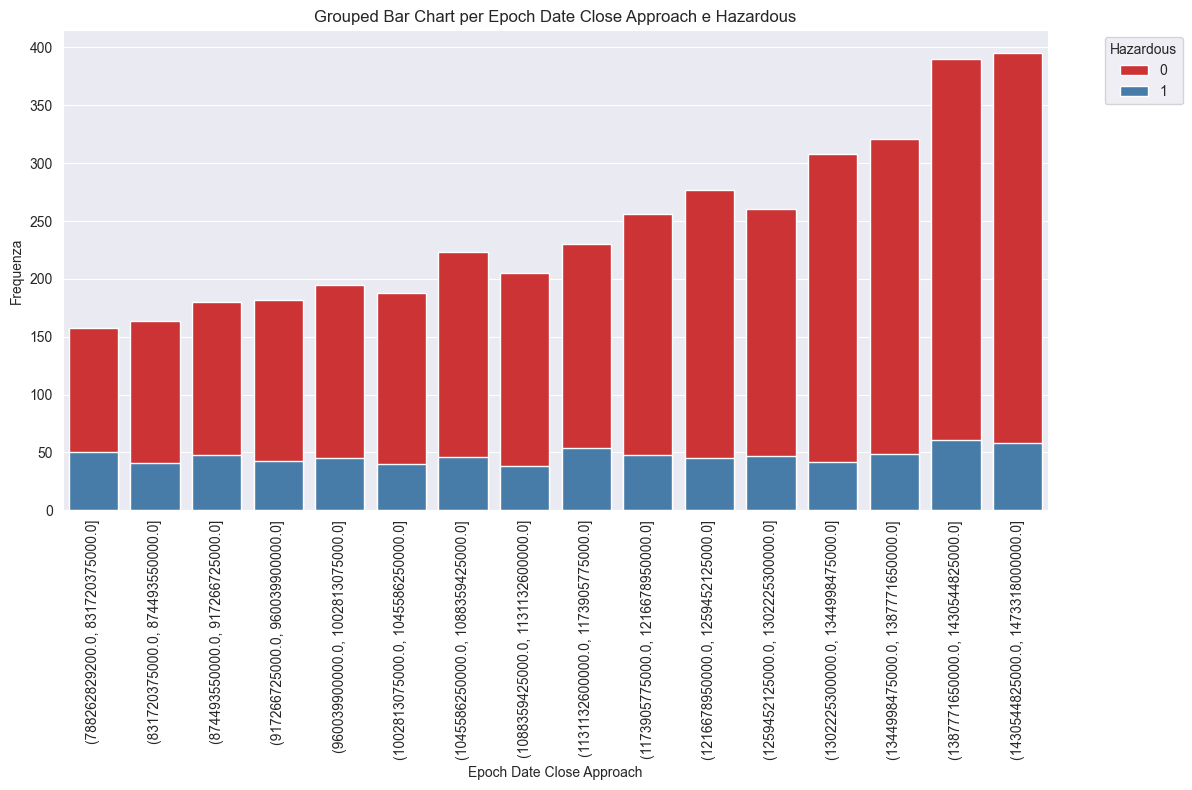

C:\Users\Garnet14\PycharmProjects\DataManagementAsteroids\src\DatabaseAsteroidsLib.py:250: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = self.df_analysis.groupby(


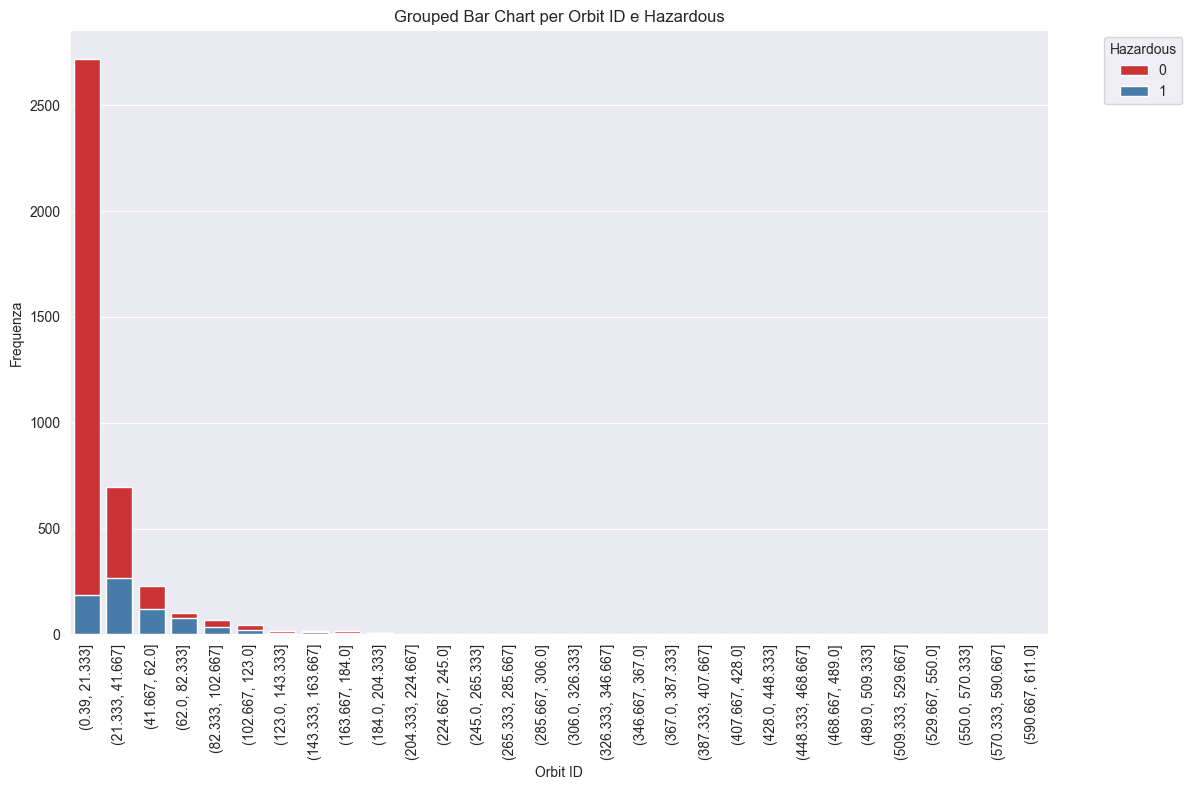

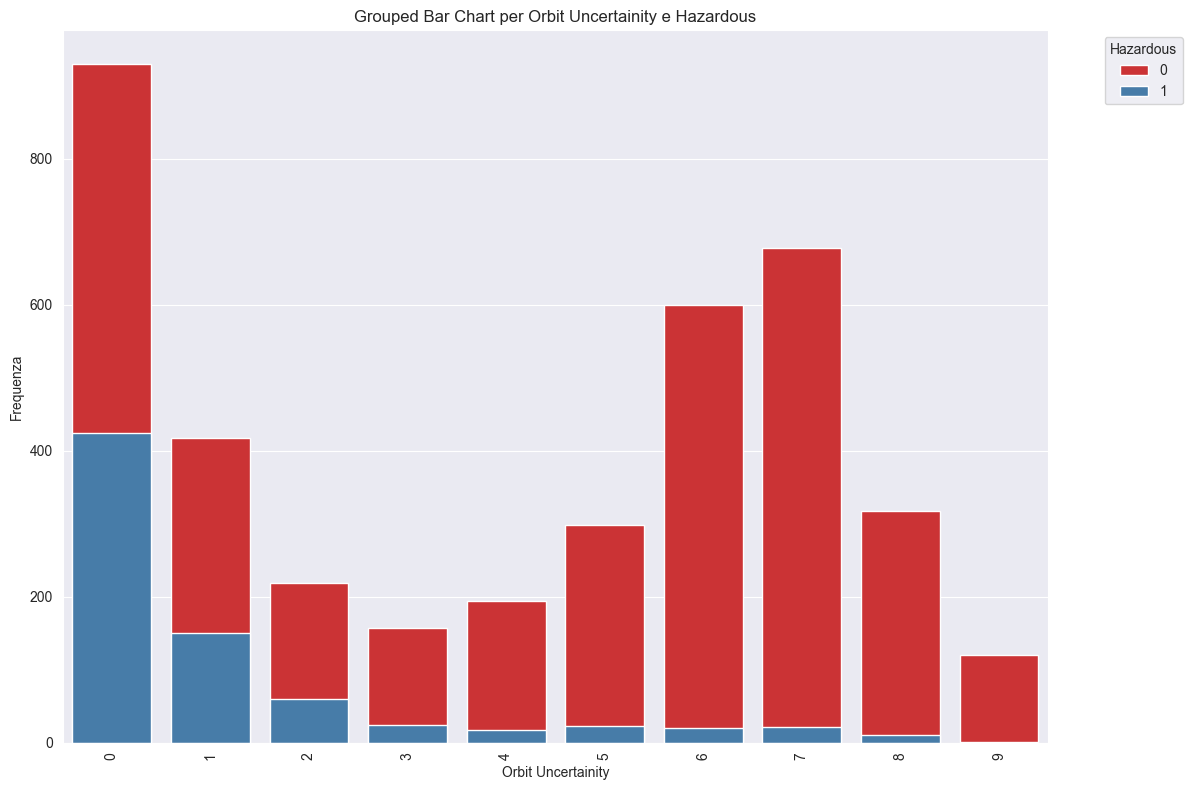

In [73]:
lib.stacked_column_chart_all()

# 5. Pca
La Principal Component Analysis (PCA) è un'analisi multivariata utilizzata per ridurre la dimensionalità di un insieme di dati, identificando le componenti principali che rappresentano la maggior parte della variazione dei dati. In Python, la libreria ```scikit-learn``` fornisce una classe PCA che può essere utilizzata per eseguire la PCA.
Inizializziamo la variabile PCA con i dati scalati.

In [74]:
lib.pca_init()

PCA()

## Curva della Varianza Spiegata Cumulata
Attraverso la Curva della Varianza Spiegata Cumulata andiamo a vedere quante features sono ottimali per addestrare il nostro modello garantendo che si catturi una percentuale significativa della varianza originale con il minor numero di componenti principali. Teniamo una soglia di 0.95 per la varianza (mostrata in rosso) e ricaviamo quante features sono ottimali.

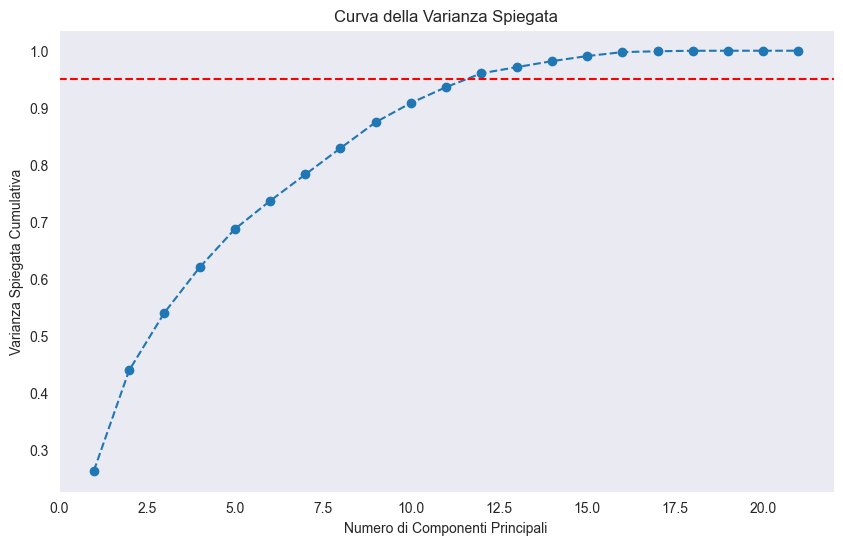

Numero di componenti principali da conservare: 12


In [75]:
limit=0.95
lib.explained_variance_plot(limit=limit)
opt_variance=lib.components_to_keep(limit=limit)

## Relazione tra le due componenti principali della PCA
Adesso andiamo a creare un DataFrame per la PCA in cui andiamo a vedere come sono correlate le prime due feature di questo nuovo DataFrame.

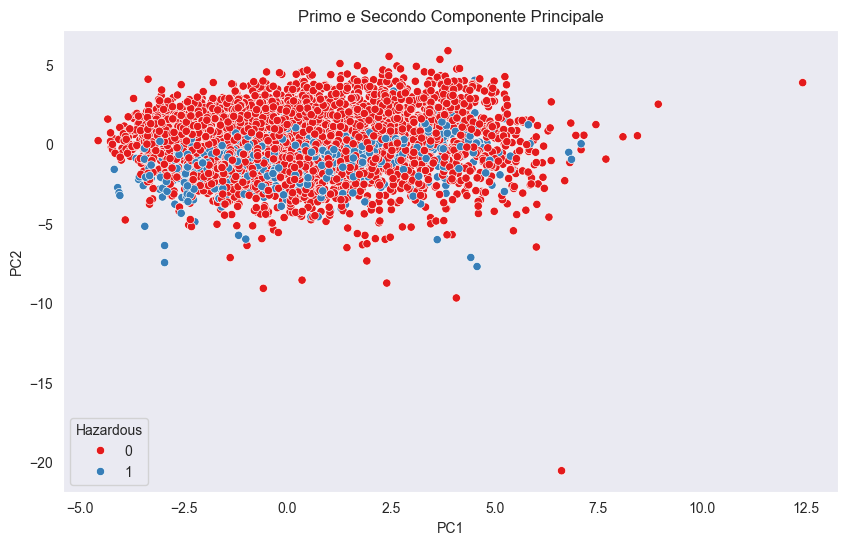

In [76]:
# Suddividiamo in feature e target il dataframe
X = df_analysis[lib.features]
y = df_analysis[lib.target_name]

# Standardizziamo per la le features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eseguiamo nuovamente la PCA mantenendo solo le componenti principali necessarie
pca = PCA(n_components=lib.pca_components)
X_pca_reduced = pca.fit_transform(X_scaled)

# Crea un DataFrame con le componenti principali e il target
df_pca = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(lib.pca_components)])
df_pca[lib.target_name] = y.values

# Visualizza le prime due componenti principali
lib.pca_swarm_plot(df=df_pca)

## Regola di Kaiser
Attraverso la regola di Kaiser abbiamo un altro confronto per capire quante componenti tenere nell'analisi dei data

In [77]:
opt_kaiser=lib.kaiser_components_rule()


Componenti principali da mantenere secondo la regola di Kaiser: 6


## Pipeline con Cross-Validation
La pipeline di ```Scikit-learn``` ci permette di testare, con un numero incrementale di componenti, quante di queste ci ottimizzano le performance per l'addestramento del nostro modello.

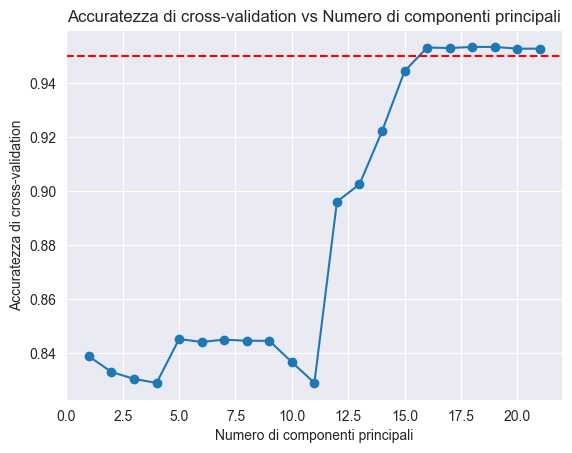

Numero ottimale di componenti principali: 19


In [78]:
opt_pipeline=lib.pca_pipeline()

Confrontando i risultati notiamo che ognuna offre valori dissimili tra loro che riportiamo in seguito:
- **Varianza Spiegata Cumulata**: 12 Componenti Ottimali
- **Regola di Kaiser**: 6 Componenti Ottimali
- **Pipeline con Cross-Validation**: 19 Componenti Ottimali

Di questi scegliamo le componenti della Varianza cumulata perchè mantiene una percentuale significativa della varianza totale.

## Componenti Principali PCA
Andiamo a mostrare i componenti principali forniti dalla PCA e manteniamo il numero di feature ottimali ottenute prima.

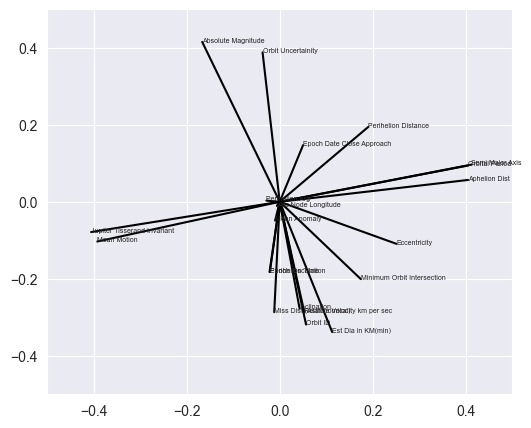

In [79]:
lib.principal_components()

In [90]:
lib.pca_component_loadings()


Componente Principale,Absolute Magnitude,Est Dia in KM(min),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
Componente 1,-0.167,0.113,0.050,0.053,-0.012,0.057,-0.037,0.174,-0.406,-0.021,0.251,0.412,0.043,-0.006,0.405,0.191,-0.029,0.405,-0.022,-0.010,-0.392
Componente 2,0.415,-0.338,0.147,-0.288,-0.287,-0.319,0.388,-0.201,-0.079,-0.182,-0.109,0.096,-0.278,-0.011,0.094,0.195,0.003,0.057,-0.183,-0.049,-0.103
Componente 3,0.045,-0.065,0.051,-0.327,0.071,-0.032,-0.149,0.136,-0.045,0.531,-0.327,0.025,-0.102,0.025,0.015,0.372,-0.035,-0.067,0.531,0.044,-0.087
Componente 4,-0.133,0.209,-0.040,-0.310,0.031,0.267,-0.061,0.275,-0.001,-0.377,-0.410,-0.047,0.133,0.022,-0.062,0.414,-0.033,-0.157,-0.383,-0.094,-0.039
Componente 5,0.051,-0.323,0.019,0.270,0.353,-0.473,0.157,0.382,-0.025,-0.012,-0.097,-0.018,0.478,-0.173,-0.021,0.101,-0.011,-0.045,-0.024,-0.139,-0.013
Componente 6,-0.007,0.080,0.176,-0.043,-0.024,0.108,-0.037,-0.039,0.009,0.072,0.014,0.001,-0.061,-0.481,0.003,-0.019,0.655,0.006,0.026,-0.524,0.007
Componente 7,0.008,0.028,0.349,0.055,-0.076,-0.008,0.112,0.104,0.008,0.001,-0.020,-0.007,0.204,0.644,-0.005,0.016,0.583,-0.012,0.024,0.217,0.019
Componente 8,-0.016,0.079,0.467,0.004,-0.132,0.077,0.057,0.021,0.007,-0.043,-0.030,-0.025,0.150,-0.546,-0.028,0.015,-0.009,-0.032,0.017,0.650,0.012
Componente 9,0.013,0.147,0.698,0.085,-0.027,0.114,0.092,-0.025,0.020,0.076,0.009,-0.038,0.071,0.146,-0.040,-0.057,-0.470,-0.028,0.033,-0.446,0.027
Componente 10,0.047,-0.069,0.241,-0.078,0.762,0.046,-0.029,0.094,0.046,-0.123,0.086,0.021,-0.521,0.032,0.029,-0.042,0.060,0.034,-0.109,0.135,0.029
